### Pick Lottery Numbers

In [29]:
#Inputs

#Define how many times you want to play the lottery
n=100000

#Choose a lottery number 
myNum=random.sample(range(1, 69), 5)+[random.randint(1,26)]

#Choose whether you would like to multiply winnings by 2. Choosing this usually adds an additional fee per ticket
powerplay=0

In [30]:
print("Your selected lottery numbers:",myNum)
print("Your selected powerball number:",myNum[5])

Your selected lottery numbers: [8, 65, 62, 7, 44, 16]
Your selected powerball number: 16


### Lottery winnings calculation

In [32]:
import random

In [33]:
def lotteryDraw (selection):

    #lottery draw  
    lottery_draw=random.sample(range(1, 69), 5)
    powerball=random.randint(1,26)
    #lottery_draw=[27, 46, 15, 31, 42]
    #powerball=11
    #print("lottery numbers:",lottery_draw)
    #print("powerball number:",powerball)
    
    #Match your Num
    powerflag=0
    count=0
    powerpick=selection[5]
    
    if powerpick ==  powerball:
        powerflag=1
    
    #go through first 5 numbers and match
    for i in range(0,len(selection)-1):
        #print(i,selection[i])
        if selection[i] in lottery_draw:
            count=count+1
    
    return (powerflag,count)


In [34]:
def lotteryWinnings(powerplay,powerflag, count):
    winnings=0
    wins=0
    
    if powerplay==0:
        if powerflag==1:
            wins=wins+1
            if count==5:
                print ("JACKPOT!!!!!")
                winnings=142600000
            elif count==4:
                winnings=50000
            elif count==3:
                winnings=100
            elif count == 2:
                winnings=7
            else:
                winnings=4
        else:
            if count>2:
                wins=wins+1
                if count==5:
                    winnings=100000
                elif count==4:
                    winnings=100
                else:
                    winnings=7
    else:
        if powerflag==1:
            wins=wins+1
            if count==5:
                print ("JACKPOT!!!!!")
                winnings=142600000
            elif count==4:
                winnings=150000
            elif count==3:
                winnings=300
            elif count == 2:
                winnings=21
            else:
                winnings=12
        else:
            if count>2:
                wins=wins+1
                if count==5:
                    winnings=2000000
                elif count==4:
                    winnings=300
                else:
                    winnings=21
    
    return(winnings,wins)

#### Simulation Function

In [35]:
#Track cumulative winnings
def simulation_with_tracking(powerplay, n, selection, sample_rate=1000):
    total_winnings = 0
    total_wins = 0
    
    # Track progress
    draws = []
    cumulative_winnings = []
    cumulative_spending = []
    # Track all combinations: rows = regular matches (0-5), cols = powerball (0-1)
    win_matrix = np.zeros((6, 2), dtype=int)
    
    ticket_cost = 2 + powerplay
    
    for i in range(n):
        (powerflag, count) = lotteryDraw(selection)
        (winnings, wins) = lotteryWinnings(powerplay, powerflag, count)
        
        total_winnings += winnings
        total_wins += wins
        win_matrix[count, powerflag] += 1
        
        # Sample data points to avoid memory issues
        if i % sample_rate == 0 or i == n-1:
            draws.append(i + 1)
            cumulative_winnings.append(total_winnings)
            cumulative_spending.append((i + 1) * ticket_cost)
    
    return total_winnings, total_wins, draws, cumulative_winnings, cumulative_spending, win_matrix



### Run Simulation

In [36]:
# Run simulation with tracking
total_winnings, total_wins, draws, cum_winnings, cum_spending, win_matrix = simulation_with_tracking(
    powerplay, n, myNum, sample_rate=10000
)


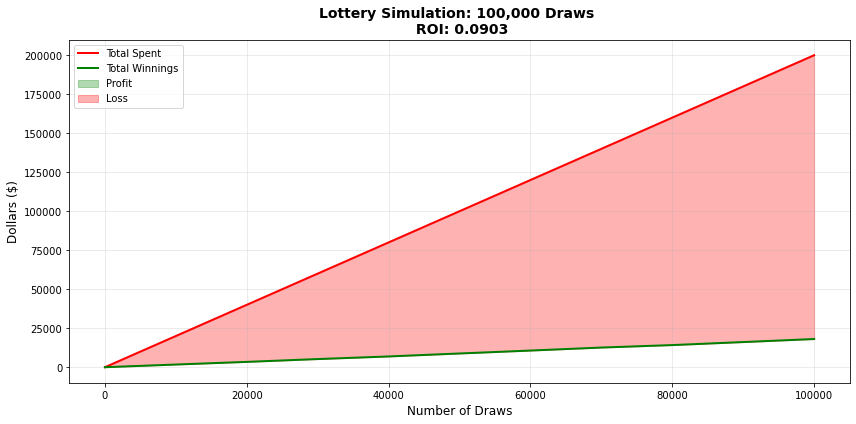

Final ROI: 0.0903


In [37]:
# Visualize
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(draws, cum_spending, label='Total Spent', color='red', linewidth=2)
ax.plot(draws, cum_winnings, label='Total Winnings', color='green', linewidth=2)
ax.fill_between(draws, cum_spending, cum_winnings, 
                 where=np.array(cum_winnings) > np.array(cum_spending), 
                 alpha=0.3, color='green', label='Profit')
ax.fill_between(draws, cum_spending, cum_winnings, 
                 where=np.array(cum_winnings) <= np.array(cum_spending), 
                 alpha=0.3, color='red', label='Loss')

ax.set_xlabel('Number of Draws', fontsize=12)
ax.set_ylabel('Dollars ($)', fontsize=12)
ax.set_title(f'Lottery Simulation: {n:,} Draws \n ROI: {total_winnings/cum_spending[-1]:.4f}', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Final ROI: {total_winnings/cum_spending[-1]:.4f}")

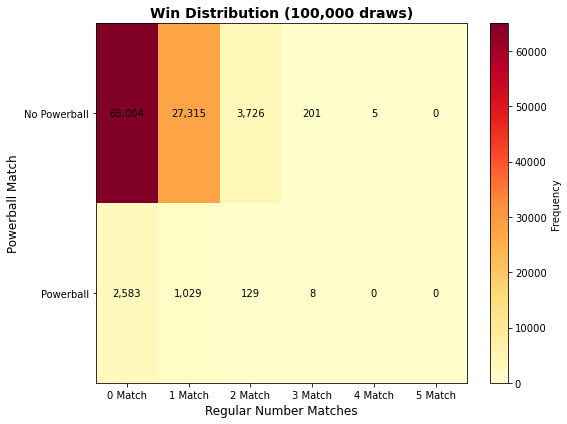

In [38]:
# Create heatmap
fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(win_matrix.T, cmap='YlOrRd', aspect='auto')

# Labels
ax.set_xticks(range(6))
ax.set_yticks(range(2))
ax.set_xticklabels(['0 Match', '1 Match', '2 Match', '3 Match', '4 Match', '5 Match'])
ax.set_yticklabels(['No Powerball', 'Powerball'])
ax.set_xlabel('Regular Number Matches', fontsize=12)
ax.set_ylabel('Powerball Match', fontsize=12)
ax.set_title(f'Win Distribution ({n:,} draws)', fontsize=14, fontweight='bold')

# Add text annotations
for i in range(2):
    for j in range(6):
        text = ax.text(j, i, f'{win_matrix[j, i]:,}',
                      ha="center", va="center", color="black", fontsize=10)

plt.colorbar(im, ax=ax, label='Frequency')
plt.tight_layout()
plt.show()